# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy import stats
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print(cities)
        
# Print the city count to confirm sufficient count
len(cities)

['atuona', 'georgetown', 'barentsburg', 'ushuaia', 'barrow', 'brokopondo', 'hilo', 'vaitupu', 'busselton', 'east london', 'esso', 'tucuman', 'constitucion', 'mocuba', 'myaundzha', 'tasiilaq', 'cape town', 'rikitea', 'ustka', 'havre-saint-pierre', 'yiyang', 'dunda', 'ponta do sol', 'vaini', 'mataura', 'punta arenas', 'ola', 'hithadhoo', 'chumikan', 'novoagansk', 'kapaa', 'victoria', 'mecca', 'clyde river', 'torbay', 'breves', 'richard toll', 'denpasar', 'sept-iles', 'ondal', 'sindor', 'laguna', 'honningsvag', 'belushya guba', 'lohja', 'mandalgovi', 'fairbanks', 'kalabo', 'westport', 'severo-kurilsk', 'dire', 'upernavik', 'ballina', 'nizhneyansk', 'saint-philippe', 'port elizabeth', 'nanortalik', 'butaritari', 'grand gaube', 'nikolskoye', 'samusu', 'chuy', 'dinsor', 'saint anthony', 'the pas', 'burnie', 'hanzhong', 'khudumelapye', 'nampula', 'kavaratti', 'cidreira', 'amderma', 'klaksvik', 'zambezi', 'diu', 'dunedin']


76

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# create list to hold data
name = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
speed = []
country = []
dt = []

counter = 0

# loop through cities to get weather data
for city in cities:
    
    counter += 1
    
    try:   
        # get weather data
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        
        print(f"Processing Record {counter} | The city name is {city}")
    
    except:
        print(f"City not found: {city}  Skipping ...")
    
    

Processing Record 1 | The city name is atuona
Processing Record 2 | The city name is georgetown
City not found: barentsburg  Skipping ...
Processing Record 4 | The city name is ushuaia
Processing Record 5 | The city name is barrow
Processing Record 6 | The city name is brokopondo
Processing Record 7 | The city name is hilo
City not found: vaitupu  Skipping ...
Processing Record 9 | The city name is busselton
Processing Record 10 | The city name is east london
Processing Record 11 | The city name is esso
Processing Record 12 | The city name is tucuman
Processing Record 13 | The city name is constitucion
Processing Record 14 | The city name is mocuba
Processing Record 15 | The city name is myaundzha
Processing Record 16 | The city name is tasiilaq
Processing Record 17 | The city name is cape town
Processing Record 18 | The city name is rikitea
Processing Record 19 | The city name is ustka
Processing Record 20 | The city name is havre-saint-pierre
Processing Record 21 | The city name is y

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a dictionary from lists
weather_dict = {"City":name,
                "Lat":lat,
                "Lng":lon,
                "Max_Temp":temp_max,
                "Humidity":humidity,
                "Cloudiness":clouds,
                "Wind_Speed":speed,
                "Country":country,
                "Date":dt}

In [8]:
# create a data frame using the dictionary
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Atuona,-9.80,-139.03,79.39,78,25,17.60,PF,1595647233
1,George Town,5.41,100.34,86.00,83,20,3.36,MY,1595647168
2,Ushuaia,-54.80,-68.30,30.20,86,90,13.87,AR,1595647046
3,Barrow,71.29,-156.79,35.60,80,90,11.41,US,1595647248
4,Distrikt Brokopondo,4.75,-55.17,77.11,84,34,5.41,SR,1595647468
...,...,...,...,...,...,...,...,...,...
62,Cidreira,-30.18,-50.21,58.78,89,100,11.36,BR,1595647070
63,Klaksvík,62.23,-6.59,51.80,100,100,8.05,FO,1595647392
64,Zambezi,-13.54,23.10,48.22,71,14,6.96,ZM,1595647473
65,Diu,20.71,70.98,84.15,75,98,4.68,IN,1595647473


In [9]:
# create csv from dataframe
weather_data.to_csv(r'output_data\raw_weather_data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# check if cities have max humidity > 100
weather_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,6.700000e+01
mean,14.942836,12.112239,62.864030,75.194030,53.671642,8.632537,1.595647e+09
std,39.573691,96.806445,14.997693,16.982378,42.311395,5.431429,1.600811e+02
min,-54.800000,-175.200000,30.200000,26.000000,0.000000,1.250000,1.595647e+09
25%,-21.280000,-64.410000,51.900000,65.500000,4.500000,4.635000,1.595647e+09
50%,19.730000,24.070000,62.260000,78.000000,75.000000,6.930000,1.595647e+09
75%,54.205000,88.500000,75.595000,87.500000,98.000000,11.385000,1.595647e+09
max,72.790000,172.790000,93.000000,100.000000,100.000000,24.160000,1.595647e+09


In [11]:
clean_city_data = weather_data[weather_data['Humidity']<=100]
clean_city_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Atuona,-9.80,-139.03,79.39,78,25,17.60,PF,1595647233
1,George Town,5.41,100.34,86.00,83,20,3.36,MY,1595647168
2,Ushuaia,-54.80,-68.30,30.20,86,90,13.87,AR,1595647046
3,Barrow,71.29,-156.79,35.60,80,90,11.41,US,1595647248
4,Distrikt Brokopondo,4.75,-55.17,77.11,84,34,5.41,SR,1595647468


In [12]:
clean_city_data.count()  #delete

City          67
Lat           67
Lng           67
Max_Temp      67
Humidity      67
Cloudiness    67
Wind_Speed    67
Country       67
Date          67
dtype: int64

In [13]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [15]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [16]:
plot_date = date.today().strftime('%m/%d/%Y')
#print(f'Plotted {plot_date}')

## Latitude vs. Temperature Plot

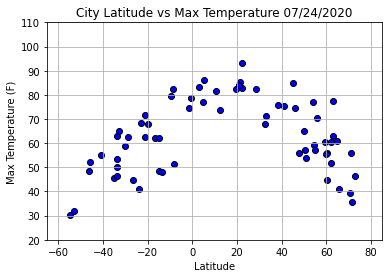

In [17]:
# create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max_Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {plot_date}")
plt.xlim(-65,85) # set the upper and lower limits of our x axis
plt.ylim(20,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

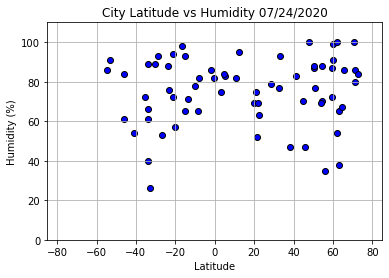

In [19]:
# create a Scatter Plot for humidity vs latitude
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

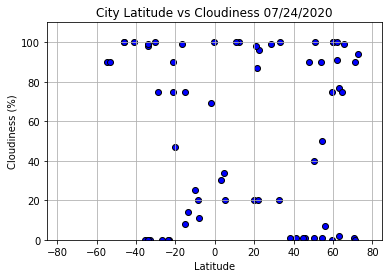

In [20]:
# create a Scatter Plot for cloudiness vs latitude
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,110) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

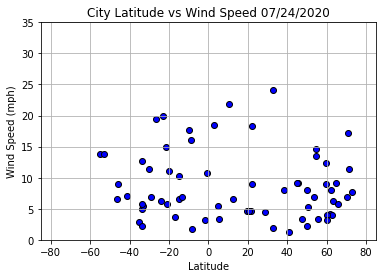

In [21]:
# create a Scatter Plot for wind speed vs latitude
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind_Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed {plot_date}")
plt.xlim(-85,85) # set the upper and lower limits of our x axis
plt.ylim(0,35) # set the upper and lower limits of our y axis
plt.grid()
plt.savefig("output_data/Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots

In [23]:
# Create Northern and Southern Hemisphere DataFrames

In [26]:
north_data = clean_city_data[clean_city_data['Lat']>=0]
north_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
1,George Town,5.41,100.34,86.00,83,20,3.36,MY,1595647168
3,Barrow,71.29,-156.79,35.60,80,90,11.41,US,1595647248
4,Distrikt Brokopondo,4.75,-55.17,77.11,84,34,5.41,SR,1595647468
5,Hilo,19.73,-155.09,82.40,69,20,4.70,US,1595647050
8,Esso,55.93,158.70,70.45,35,7,3.27,RU,1595647468


In [28]:
south_data = clean_city_data[clean_city_data['Lat']<0]
south_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Atuona,-9.80,-139.03,79.39,78,25,17.60,PF,1595647233
2,Ushuaia,-54.80,-68.30,30.20,86,90,13.87,AR,1595647046
6,Busselton,-33.65,115.33,63.00,61,98,5.01,AU,1595646958
7,East London,-33.02,27.91,65.03,26,0,5.50,ZA,1595646961
9,San Miguel de Tucumán,-26.82,-65.22,44.60,53,0,19.46,AR,1595647393


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.7926


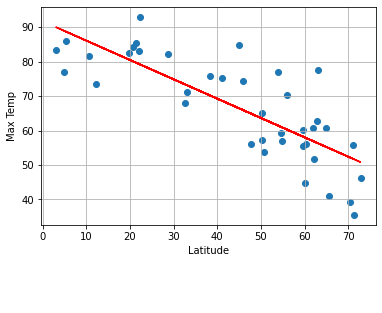

In [29]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Max_Temp']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
plt.savefig("output_data/Northern Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.6872


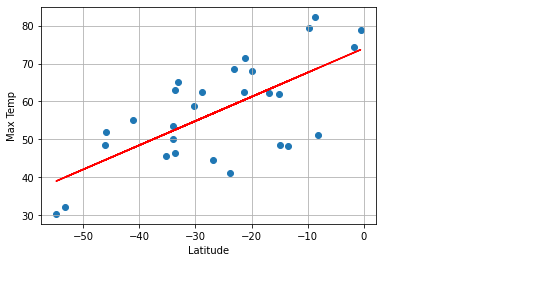

In [30]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Max_Temp']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()
plt.savefig("output_data/Southern Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0387


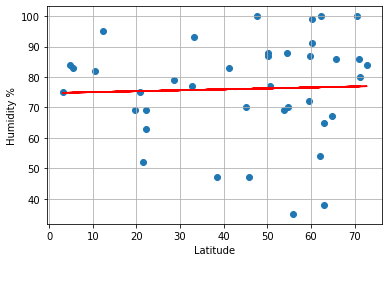

In [31]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Humidity']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("output_data/Northern Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1422


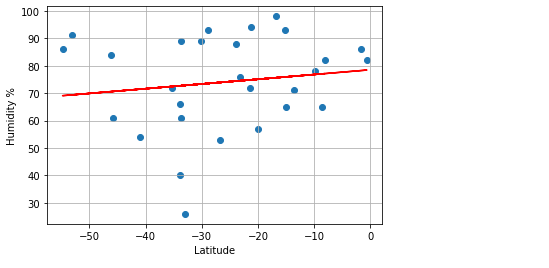

In [32]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Humidity']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("output_data/Southern Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.0084


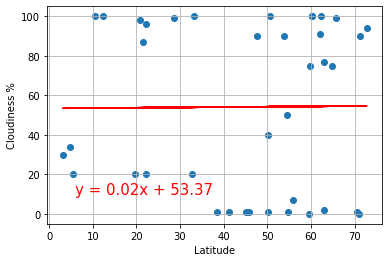

In [33]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Cloudiness']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("output_data/Northern Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.2611


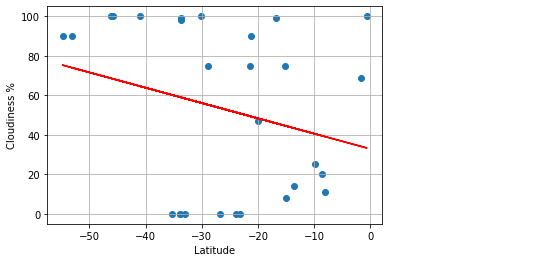

In [34]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Cloudiness']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("output_data/Southern Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.1314


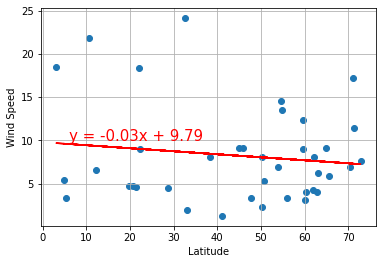

In [35]:
# calculate correlation 
x_values = north_data['Lat']
y_values = north_data['Wind_Speed']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("output_data/Northern wind Speed vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.1422


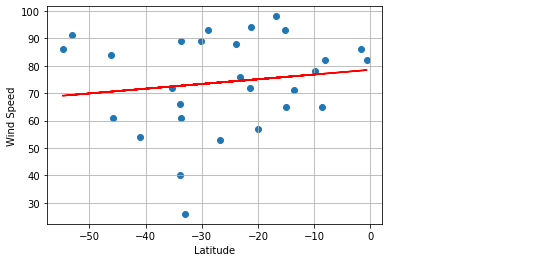

In [36]:
# calculate correlation 
x_values = south_data['Lat']
y_values = south_data['Humidity']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("output_data/Southern wind Speed vs. Latitude Linear Regression.png")
plt.show()

In [ ]:
# The End